Comparing Spots in PHOEBE 2 vs PHOEBE Legacy
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Adding Spots and Compute Options
---------------------

In [3]:
b.add_spot(component='primary', relteff=0.8, radius=20, colat=45, colon=90, feature='spot01')

<ParameterSet: 5 parameters | contexts: feature, compute>

In [4]:
b.add_dataset('lc', times=np.linspace(0,1,101))

<ParameterSet: 73 parameters | contexts: dataset, figure, constraint, compute>

In [5]:
b.add_compute('phoebe', irrad_method='none', compute='phoebe2')

<ParameterSet: 35 parameters | datasets: _default, lc01>

In [6]:
b.add_compute('legacy', irrad_method='none', compute='phoebe1')

<ParameterSet: 29 parameters | datasets: _default, lc01>

Let's use the external atmospheres available for both phoebe1 and phoebe2

In [7]:
b.set_value_all('atm', 'extern_planckint')

Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='phoebe1'.  Change ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='phoebe1'.  Change ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='phoebe1'.  Change ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error

Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='phoebe1'.  Change ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@secondary@phoebe01 or ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@secondary@phoebe2 or ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='phoebe1'.  Change ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised and w

In [8]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe01 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@primary@phoebe2 or ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by 'legacy' backend used by compute='phoebe1'.  Change ld_mode@primary@lc01.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Thu, 17 Sep 2020 18:06 BUNDLE       WARNING ld_mode='interp' not supported by atm='extern_planckint'.  Either change atm@secondary@phoebe01 or ld_mode@secondary@lc01.  If not addressed, this warning will continue to be raised 

In [9]:
b.run_compute('phoebe2', model='phoebe2model')

100%|██████████| 101/101 [00:03<00:00, 30.12it/s]


<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

In [10]:
b.run_compute('phoebe1', model='phoebe1model')

Thu, 17 Sep 2020 18:06 IO           WARNING requiv_max@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING logg@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING freq@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING pitch@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING yaw@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING long_an@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING irrad_frac_lost_bol@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING ld_mode_bol@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING ld_func_bol@primary@star@component has no phoebe 1 corollary
Thu, 17 Sep 2020 18:06 IO           WARNING ld_coeffs_source_bol@primary@star@co

<ParameterSet: 3 parameters | qualifiers: fluxes, times, comments>

Plotting
------------

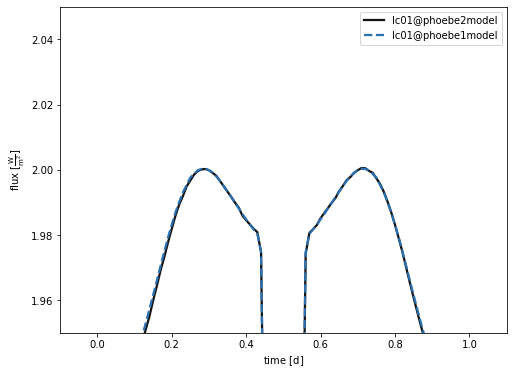

In [11]:
afig, mplfig = b.plot(legend=True, ylim=(1.95, 2.05), show=True)